In [13]:
import jupyter
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import scipy
from sklearn import tree, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import math
from classes.data import Data


In [14]:
def load_data(file):
    data = []
    with open(file) as f:
        for line in f:
            data.append(line.strip("\n").split(","))
    return data

def decision_tree(data, classLabel):
    arbre = tree.DecisionTreeClassifier()
    return arbre.fit(data, classLabel)




In [15]:
data = Data(load_data("glass.data"))
data.removeColumn("Fe")


In [16]:
# explications pour les changements apportés aux données - vois l'annexe pour les diagrammes

In [34]:
# Arbre de décision et prédiction

train_features, test_features, train_label, test_label= data.splitNormalizedData(0.2)
arbre = decision_tree(train_features, train_label)
prediction = arbre.predict(test_features)

print("Number of mislabeled points out of a total %d points : %d" % ((test_features.shape[0]), (test_label != prediction).sum()))
conf_mx = confusion_matrix(test_label, prediction)
conf_mx



Number of mislabeled points out of a total 43 ponits : 13


array([[ 8,  1,  2,  0,  0,  1],
       [ 0, 10,  3,  1,  0,  1],
       [ 2,  1,  3,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  1],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  6]], dtype=int64)

In [18]:

gnb = GaussianNB()
baye_pred = gnb.fit(train_features, train_label).predict(test_features)
print("Number of mislabeled points out of a total %d points : %d" % ((test_features.shape[0]), (test_label != baye_pred).sum()))

Number of mislabeled points out of a total 43 points : 31


In [19]:

neigh = KNeighborsClassifier(n_neighbors = round(math.sqrt(train_features.shape[0])/7))
neigh.fit(train_features, train_label)
knn_pred = neigh.predict(test_features)

print("Number of mislabeled points out of a total %d points : %d" % ((test_features.shape[0]), (test_label != knn_pred).sum()))


Number of mislabeled points out of a total 43 points : 12


In [20]:
# '''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
# ------------------------------------- ANNEXE ------------------------------------------
# .......................................................................................

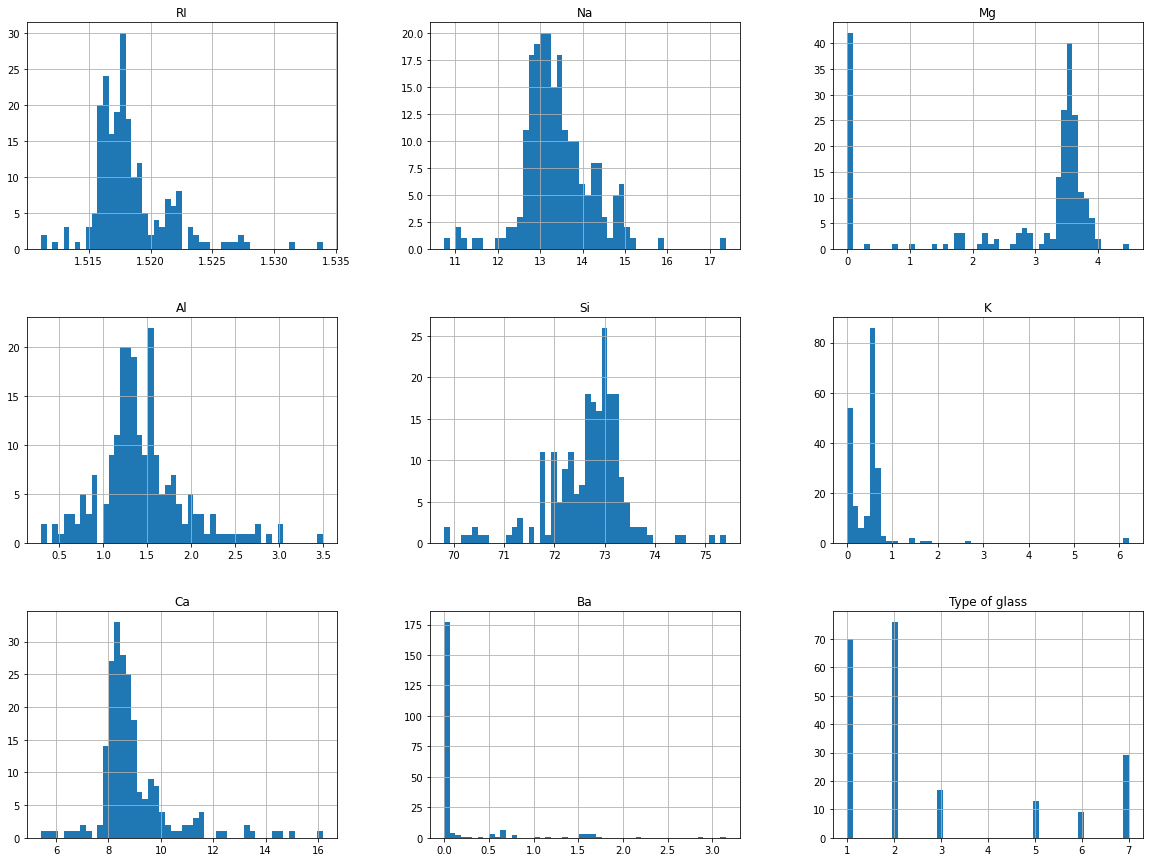

In [21]:
# D1.Histogramme pour toutes les classes 

data.data_frame.hist(bins=50, figsize=(20, 15))
plt.show()

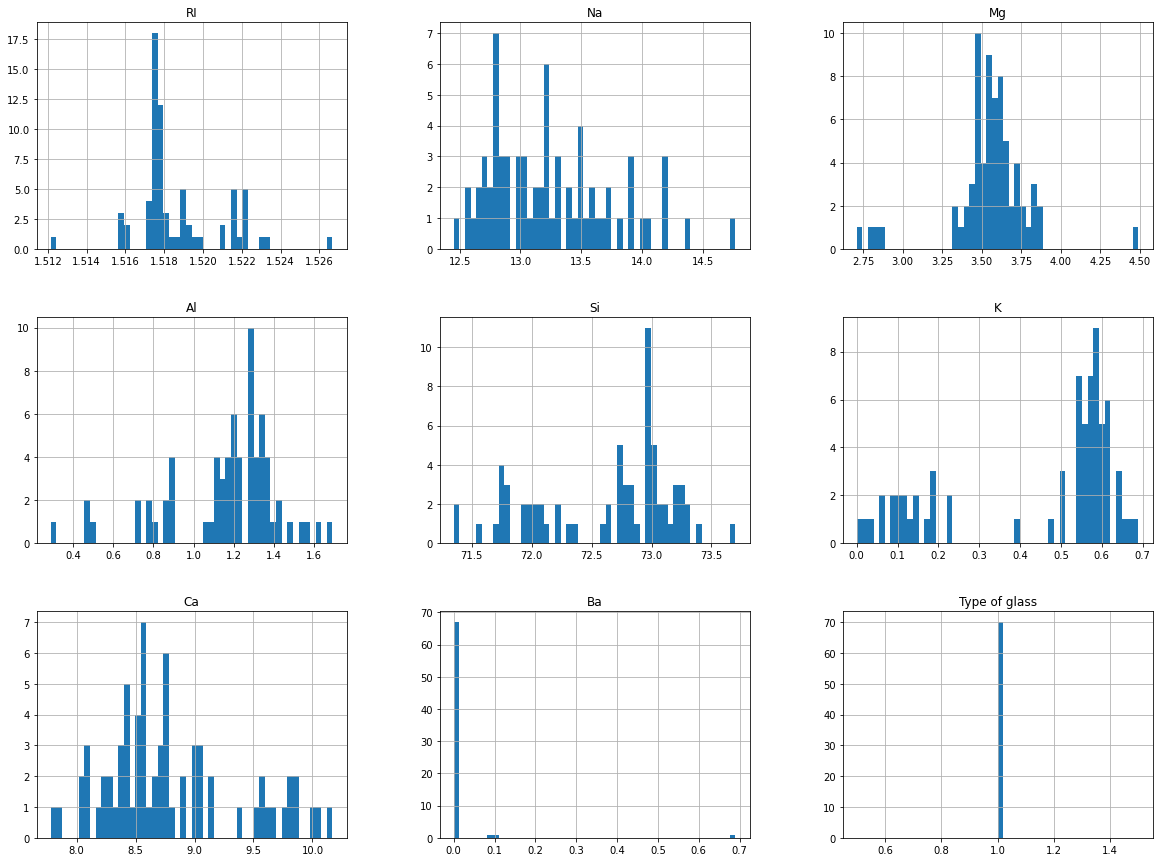

In [22]:
# D2.Histogramme pour la classe 1

data.getClassData(1).hist(bins=50, figsize=(20, 15))
plt.show()

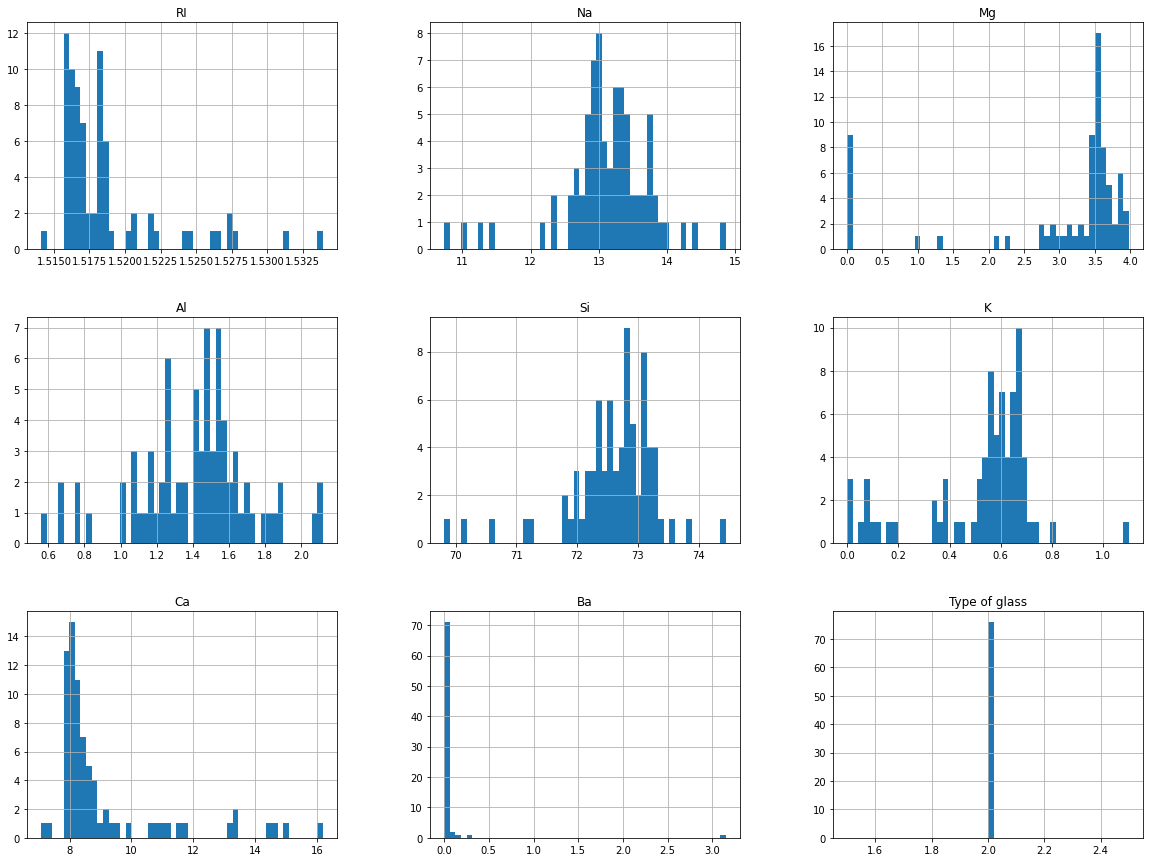

In [23]:
# D3.Histogramme pour la classe 2

data.getClassData(2).hist(bins=50, figsize=(20, 15))
plt.show()

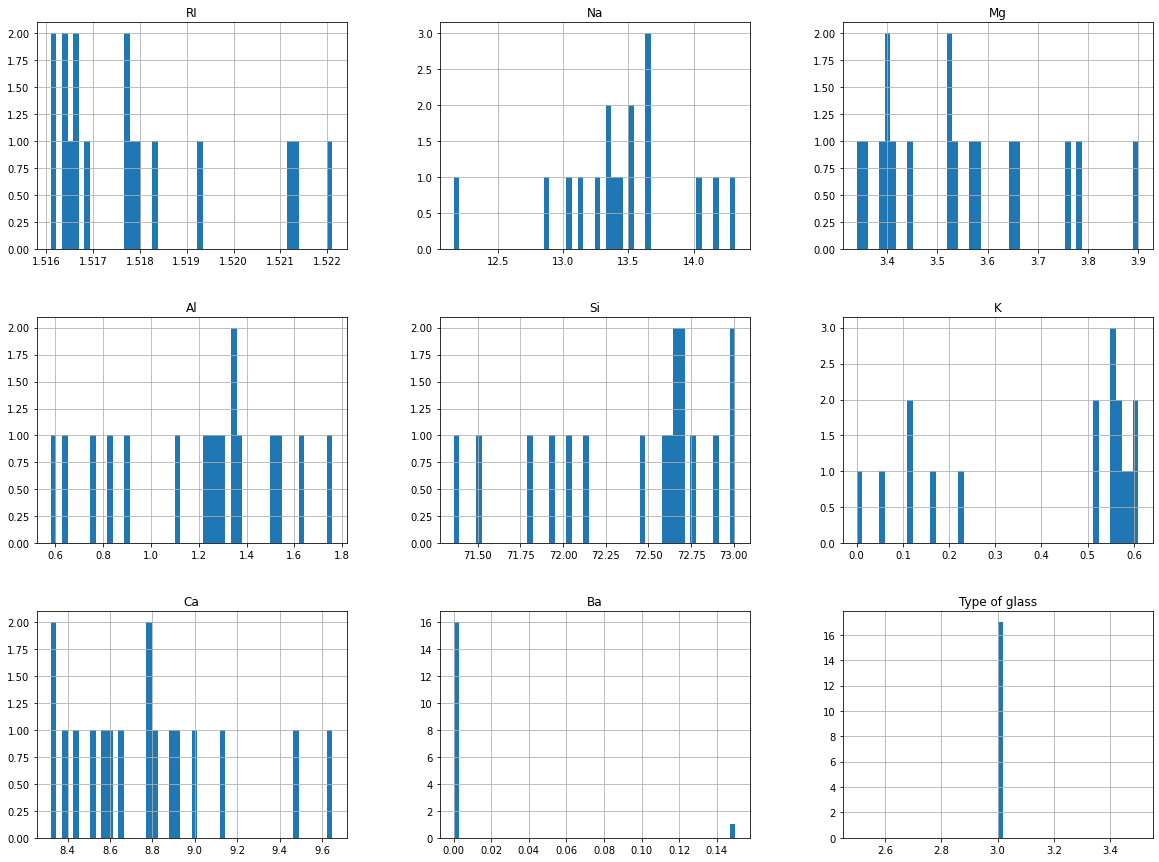

In [24]:
# D4.Histogramme pour la classe 3

data.getClassData(3).hist(bins=50, figsize=(20, 15))
plt.show()

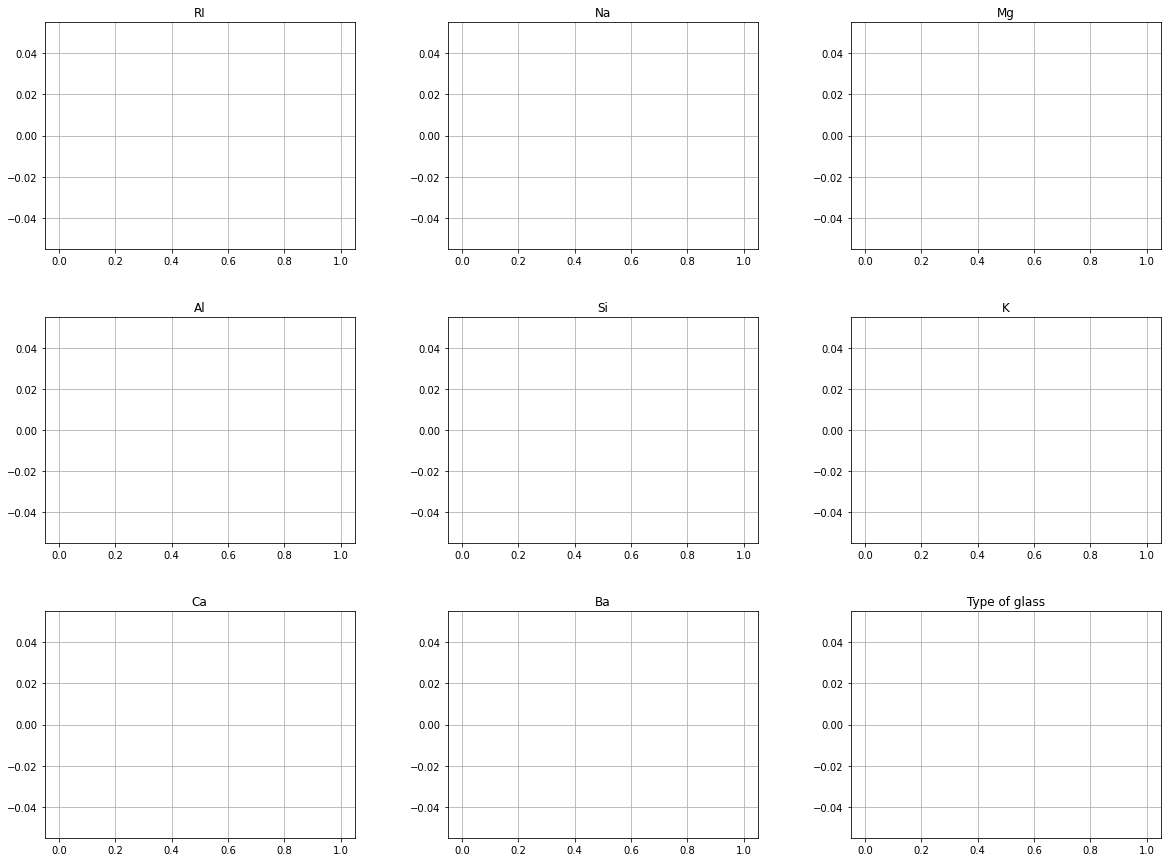

In [25]:
# D5.Histogramme pour la classe 4

data.getClassData(4).hist(bins=50, figsize=(20, 15))
plt.show()

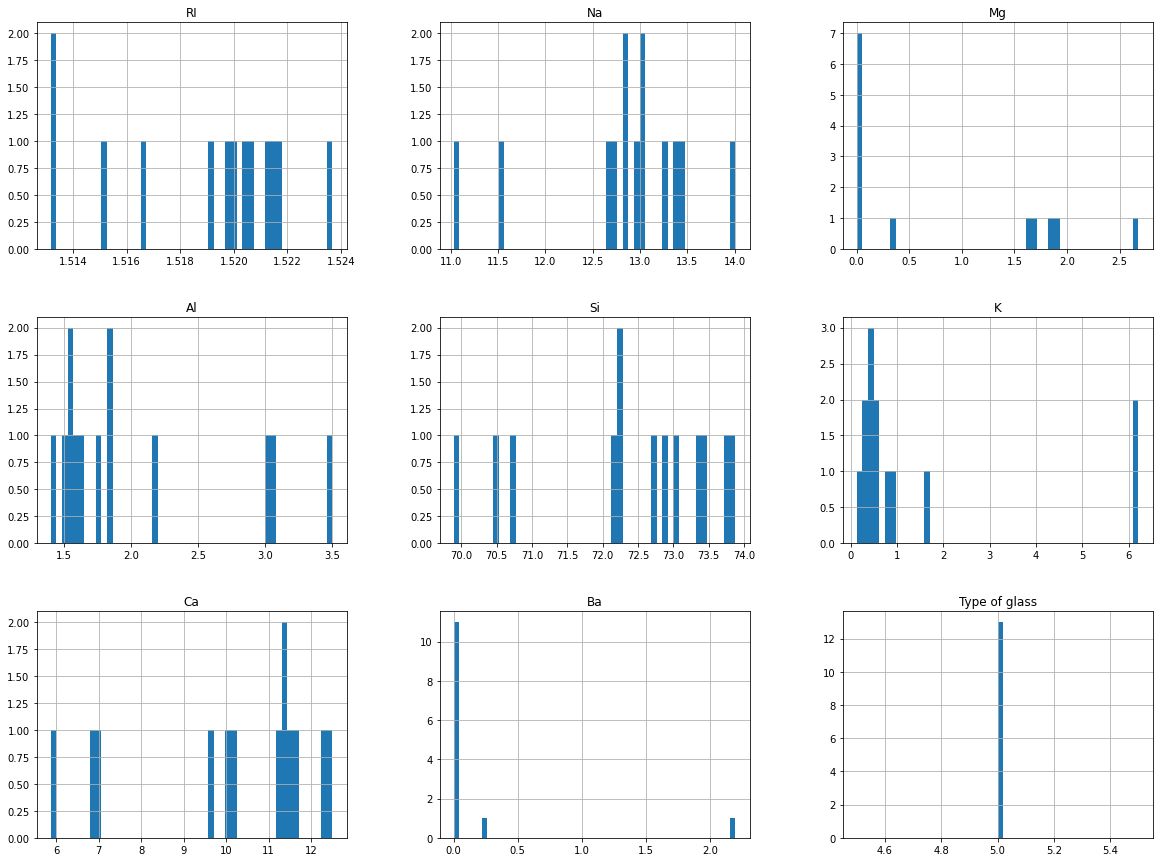

In [26]:
# D6.Histogramme pour la classe 5

data.getClassData(5).hist(bins=50, figsize=(20, 15))
plt.show()

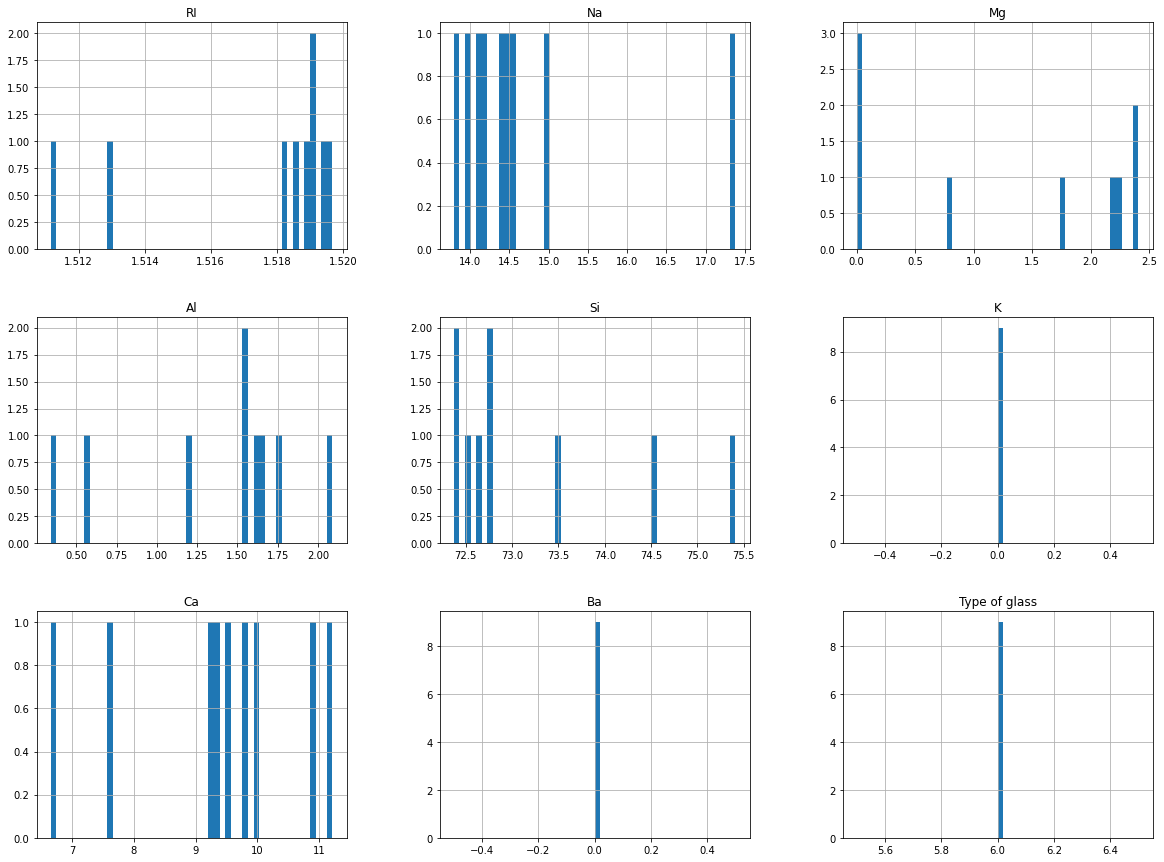

In [27]:
# D7.Histogramme pour la classe 6

data.getClassData(6).hist(bins=50, figsize=(20, 15))
plt.show()

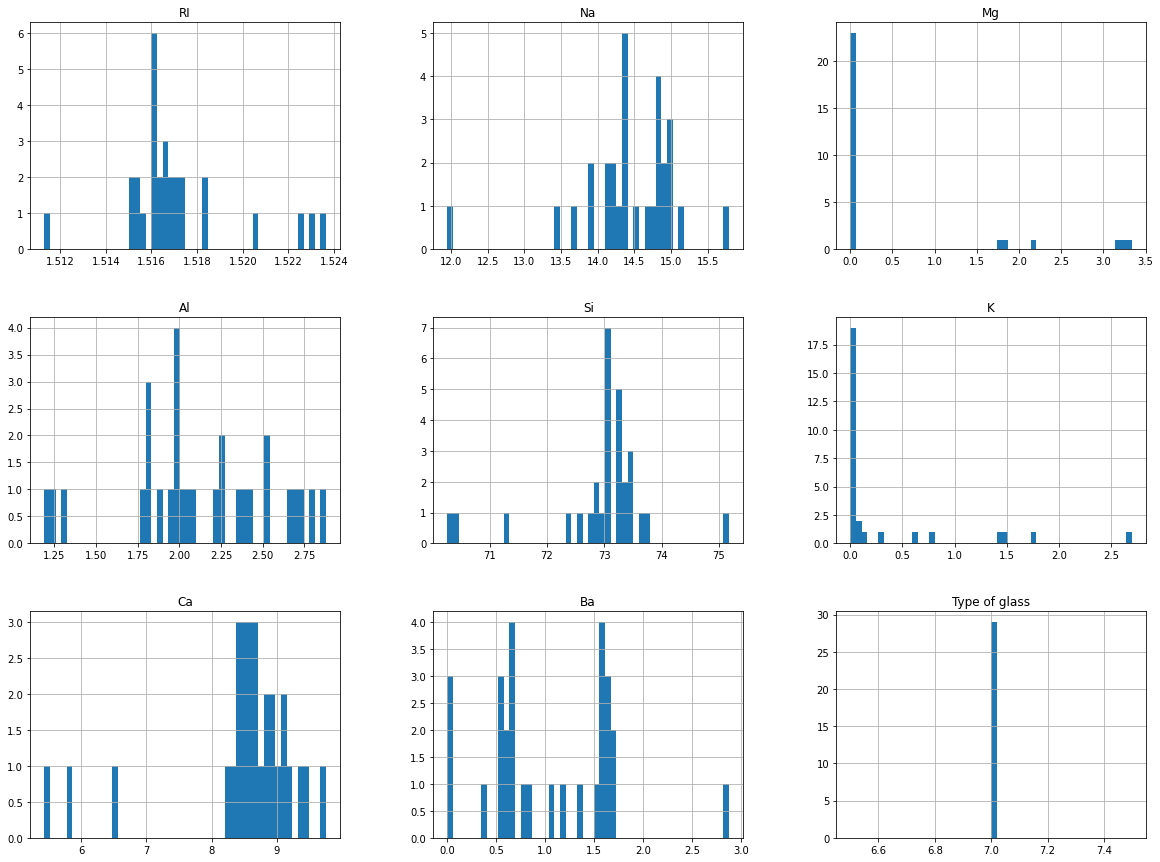

In [28]:
# D8.Histogramme pour la classe 7

data.getClassData(7).hist(bins=50, figsize=(20, 15))
plt.show()

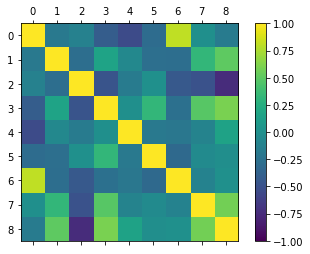

In [29]:
# D9.Matrice de confusion pour toutes les classes

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data.data_frame.corr(), vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

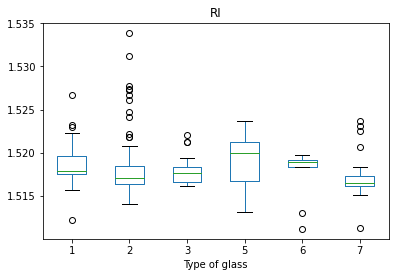

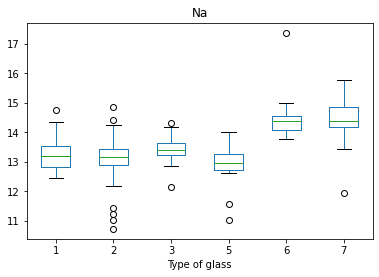

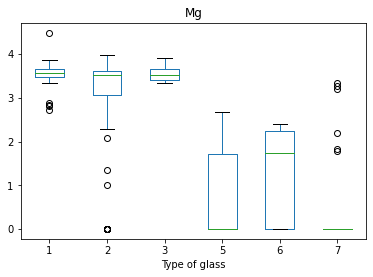

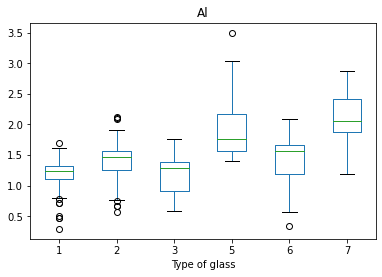

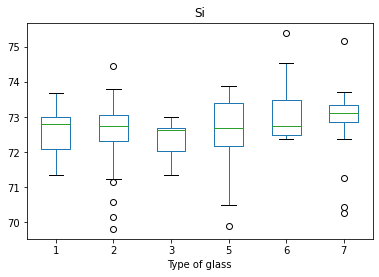

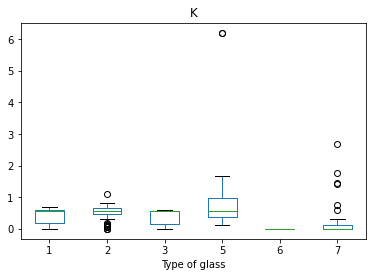

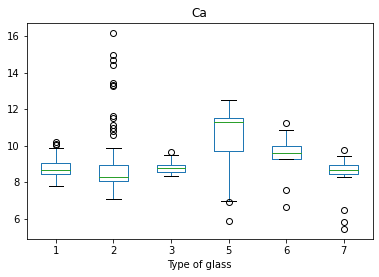

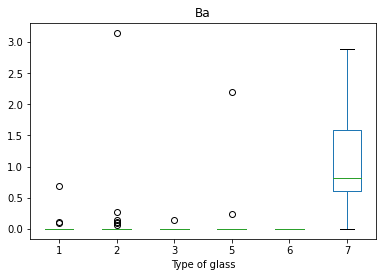

In [30]:
# D10.Diagrammes à moustache pour chaque attribut selon la classe

for column in data.data_frame.columns:
    if column == "Type of glass":
        continue
    data.data_frame.boxplot(column=column, by="Type of glass", grid=False)
    plt.suptitle('')
    plt.show()
    
    del(column)